## Introduction

### Project Description

This project analyzed a dataset of shelter dogs to uncover trends and insights that could help address Georgia's stray and homeless dog population. The data included key attributes such as adoption fees, breed, age, gender, and shelter location. By examining these variables, the project aimed to understand the demographic composition of shelter dogs, identify patterns in adoption fees, and explore factors that may influence a dog's chances of adoption.

*Note: please see Project 1 for detailed information on the data collection process and the data dictionary. Please see data_cleaning.ipynb for the data validationa and cleaning process.*



### Key Findings
- Mixed Breed Majority: Approximately 86% of shelter dogs are mixed breeds, reflecting the diversity typical in stray and surrendered dog populations. Purebred dogs, especially high-demand breeds, are less common due to their popularity in the general pet market.
- Age Distribution Skewed Towards Adults: Adult dogs make up the largest age group in shelters (~64%), with fewer puppies and seniors. This suggests that younger dogs are adopted more quickly, while older dogs may face longer shelter stays.
- Concentration in Key Locations: Nearly half of the shelter listings come from areas like Chamblee and Atlanta, indicating higher shelter capacities or greater stray populations in these regions.

## Importing Needed Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Import Dataset

In [2]:
df_dogs_info = pd.read_csv('df_dogs_cleaned.csv')
df_dogs = df_dogs_info.copy()

In [3]:
# Counting number of observations
print("There are ", df_dogs.shape[0], " observations in the dataset.")

There are  4255  observations in the dataset.


In [4]:
df_dogs.dtypes

Unnamed: 0         int64
pet_id             int64
primary_breed     object
mixed_breed         bool
age               object
gender            object
shelter_name      object
num_photos         int64
pet_location      object
adoption_fee     float64
dtype: object

## Descriptive Statistics

### Continuous Variables

The number of photos and the adoption fee are the only continuous variables in the data. 

In [5]:
df_dogs[['num_photos', 'adoption_fee']].describe()

,num_photos,adoption_fee
count,4255.000000,815.000000
mean,2.885781,230.998550
std,1.664396,106.467355
min,0.000000,25.000000
25%,1.000000,175.000000
50%,3.000000,250.000000
75%,3.000000,300.000000
max,17.000000,600.000000


Findings:
- Most dog profiles have around 3 photos, while few have many photos 
- There are only 815 records of adoption fees, and the data suggests that some of the missing values could be due to no adoption fees 
- The average adoption fee is ~$231, however there does seem to be quite a bit of variability, which could be due to factors such as breed, age, or shelter policies 
- Most adoption fees fall between $175 and $300

### Categorical Variables

The categorical variables in the dataset are primary_breed, mixed_breed, age, gender, size, shelter_name, and pet_location

In [6]:
# function that creates proportion tables for categorical variables 
def create_proportions_table(df, column_name):

    # Calculating the proportions and round to 2 decimal places
    proportions = (df[column_name].value_counts(normalize=True)*100).round(2)

    # Limiting to top 10 categories if more than 10
    if len(proportions) > 10:
        proportions = proportions.head(10)

        # Converting proportions to a DataFrame for displaying in the table
        df_proportions = pd.DataFrame(proportions).reset_index()
        df_proportions.columns = [f'{column_name}', 'Proportion (%) Top 10']
    else:
        # Converting proportions to a DataFrame for displaying in the table
        df_proportions = pd.DataFrame(proportions).reset_index()
        df_proportions.columns = [f'{column_name}', 'Proportion (%)']
    
    # Create figure only (no axis needed)
    fig = plt.figure(figsize=(6, len(df_proportions) * 0.1))
    plt.axis('off')  

    # Creating table 
    table = plt.table(cellText=df_proportions.values, 
                    colLabels=df_proportions.columns, 
                    cellLoc='center', 
                    loc='center')

    # Formatting table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    for (i, j), cell in table.get_celld().items():
        if i == 0:  # Header row
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor('blue')
        cell.set_edgecolor('black')
        

    plt.show()
    plt.show()

#### Mixed Breed

In [17]:
# Replacing True with 'mixed' and False with 'pure' in the mixed_breed column
df_dogs['mixed_breed'] = df_dogs['mixed_breed'].replace({True: 'mixed', False: 'pure'})

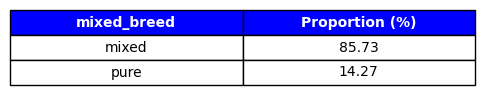

In [18]:
create_proportions_table(df_dogs, 'mixed_breed')

Findings:
- Mixed breed dogs make up ~86% of the listings, which is a substantial majority 
    - The high percentage of mixed breed dogs is common in shelter environments where stray and surrendered dogs often have diverse genetric backgrounds
- Pure bred dogs represent only 14% of listings
    - The lack of prevalence of pure breds in shelters is likely due to the fact that there is higher demand for pure bred dogs in the general pet market and generally lower abandonment rates 

#### Primary Breed

Since the primary breed indicates the main breed of the dog (some dogs could have multiple breeds, some dogs could just have one), I am going to join together the primary breed field with the mixed breed field to seperate the pure breds and the mixed breeds for each primary breed. 


In [9]:
# Combining the fields into a new field "breed"
df_dogs['breed'] = df_dogs['primary_breed']+"_"+df_dogs['mixed_breed'] 

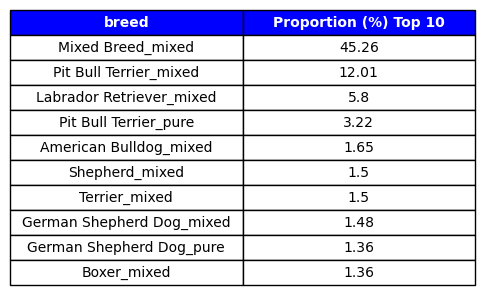

In [10]:
create_proportions_table(df_dogs, 'breed')

Findings:
- Mixed breed dogs where there isn't a primary breed identified make up ~45% of the listings
- Mixed pit bull terriers and labrador retrievers are common primary breeds of mixed dogs in shelters 
- Pure bred pit bull terriers is the only pure bred breed in the top five listings
- The high pit bull terrier representation (both mixed and pure), highlights the potential challenges and opportunities for shelters 

#### Age

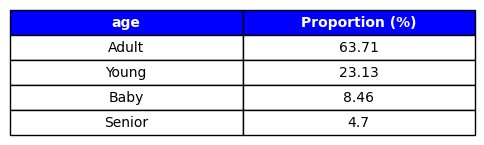

In [11]:
create_proportions_table(df_dogs, 'age')

Findings:
- Adult dogs make up the largest proportion (~64%), indicating that the majority of dogs in shelters are mature dogs 
- Young dogs make up 23% of the listings, likely representing puppies that have aged out of peak adoptability
- Babies (puppies) make up 8.46% of the listings, which likely reflects the fact that puppies tend to be adopted more quickly than older dogs
- Senior dogs represent the smallest proportion of shelter listings, potentially because they are often prioritized for euthanasia or they are more likely to stay with owners long-term

#### Gender

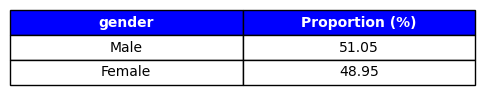

In [12]:
create_proportions_table(df_dogs, 'gender')

Findings:
- The gender distribution is almost equal, indicating that male and females are equally likely to end up in shelters 

#### Pet Location

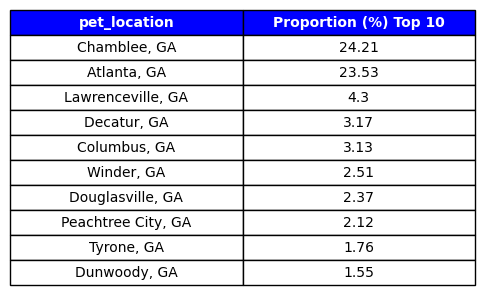

In [13]:
create_proportions_table(df_dogs, 'pet_location')

Findings: 
- Chamblee and Atlanta account for nearly 48% of listed homeless dogs, suggesting that these cities might have more shelters, larger shelter capacity, or a higher population of stray dogs


### Age and Adoption Fee

Please note that adoption fee information is only available for 815 instances, in which it is always greater than 0. It is unclear if the absence of an adoption fee indicates a fee of zero. Therefore, I want to conduct two seperate analyses of adoption fees on age:
- Analysis with non-null adoption fees only: In this analysis, I will drop all instances where the adoption fee is nan. This will allow us to focus exclusively on cases where an explicit fee is provided.
- Analysis with missing fees set to zero: In this analysis, I will replace all nan values in the adoption fee field with zero. This approach assumes that missing values imply a zero fee, providing a broader view of adoption fees that includes potential cases of waived fees.




In [14]:
# Creating dataframe with dropped nan values 
df_dogs_fees = df_dogs.dropna()


In [15]:
# Creating dataframe where nan values are 0
df_dogs_no_nan = df_dogs.copy()
df_dogs_no_nan['adoption_fee'] = df_dogs_no_nan['adoption_fee'].fillna(0)


/var/folders/q1/01n67gwn27z65jnn2t76vm6w0000gn/T/ipykernel_64978/3179938534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dogs_fees['age'] = pd.Categorical(df_dogs_fees['age'], categories=age_order, ordered=True)


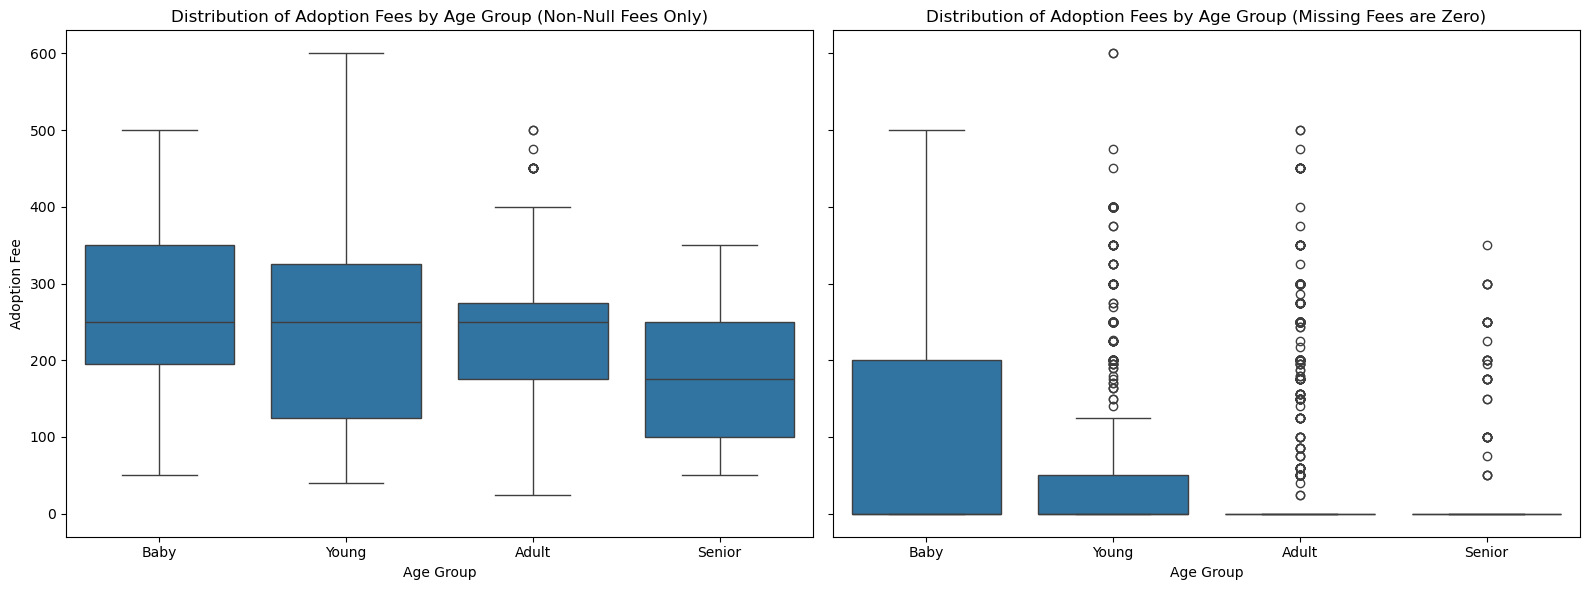

In [16]:
# Setting up figure and subplots
age_order = ['Baby', 'Young', 'Adult', 'Senior']
df_dogs_fees['age'] = pd.Categorical(df_dogs_fees['age'], categories=age_order, ordered=True)
df_dogs_no_nan['age'] = pd.Categorical(df_dogs_no_nan['age'], categories=age_order, ordered=True)


fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plotting for the first dataframe
sns.boxplot(x='age', y='adoption_fee', data=df_dogs_fees, ax=axes[0])
axes[0].set_title("Distribution of Adoption Fees by Age Group (Non-Null Fees Only)")
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Adoption Fee")

# Plotting for the second dataframe
sns.boxplot(x='age', y='adoption_fee', data=df_dogs_no_nan, ax=axes[1])
axes[1].set_title("Distribution of Adoption Fees by Age Group (Missing Fees are Zero)")
axes[1].set_xlabel("Age Group")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

Findings:
- When only including non-null fees:
    - The median adoption fee is consistent across age groups, except for Senior dogs where it is lower
    - The Baby age group box plot appears shifted upwards compared to other age groups, indicating that, in general, Baby dogs tend to have higher adoption fee
    - Baby and Young age groups show a larger spread in fees, suggesting more variation in adoption fees for younger dogs 
    - There are a few outliers in the Adult group
- When assuming that nan values are 0:
    - Many values are now at or close to zero, especially in the Adult, Young, and Senior groups, creating a dense cluster at the bottom
    - The median fee for all age groups is significantly lower (close to if not zero), indicating a substantial proportion of waived or zero fees in these groups

- Setting missing fees to zero dramatically changes the distribution, lowering the median fee in all age groups 

Given the fact that we don't know if these missing values are actually 0, the adoption fee analysis is limited in its value:
- The data can provide some insight, such as the generally higher fees for Baby dogs when fees are explicitly provided
- However, the lack of clarity around missing values makes it hard to determine the true extent of waived fees and age-based pricing patterns


## Conclusion and Implications

The findings of this project reveal some useful insights into the dynamics of shelter dog listings and adoption fees but are also limited by data ambiguity around missing adoption fees.

**Key Insights:**
- Adoption Fee Structure:
    - When non-null fees are analyzed, Baby (puppy) dogs tend to have higher adoption fees, indicating that shelters may leverage demand for younger dogs to offset costs. The fee consistency across most age groups (except Seniors) suggests that shelters might not strongly differentiate fees based on age, with a few exceptions for high-demand puppies.
- Demographics and Challenges in Shelter Populations:
    - The age distribution reveals that Adult dogs make up the largest proportion of shelter listings (~64%), while Young dogs account for about 23%, likely representing puppies that have aged beyond peak adoptability.
    - The high proportion of mixed breed dogs (86%) reflects the typical shelter demographic, as many stray and surrendered dogs come from diverse genetic backgrounds. Purebred dogs, making up only 14% of listings, are likely less common in shelters due to higher demand in the general pet market and potentially lower abandonment rates.
    - The overrepresentation of pit bull terriers (both mixed and purebred) highlights potential challenges for shelters, as this breed often faces stigma and longer adoption waits, suggesting the need for targeted strategies to promote adoption of this breed.
- Shelter Locations:
    - The high concentration of listings from Chamblee and Atlanta suggests that these areas may have larger shelters or higher stray populations. This information could be valuable for resource allocation, community outreach, or targeted adoption drives in areas with higher shelter populations.


Based on the findings from this project, several strategies emerge that could help reduce the number of homeless dogs and address the broader stray dog issue in Georgia. These strategies target shelter practices, community outreach, and broader policy initiatives to support sustainable, long-term impact.

**Strategies:**
- Targeted Adoption Initiatives 
    - Offer adoption incentives, such as reduced or waived fees, for Adult and Senior dogs to increase their appeal. "Senior for Senior" programs, pairing older adults with senior dogs, could also encourage adoption.
    - Promote "tween" adoption capaigns to highlight young dogs as beyond the puppy training phase but still adaptable, or showcase young dogs as active companions for adopters with adventurous lifestyles.
    - Implement targeted campaigns to reduce stigma around breeds like pit bull terriers by highlighting their positive qualities and partnering with breed advocacy groups.
- Increased Capacity and Support in High-Impact Areas
    - Direct more resources (funding, staff, and space) to shelters in high-need areas like Chamblee and Atlanta.
    - Use mobile adoption units and pop-up events in underserved areas to broaden adoption reach and ease overcrowding in urban shelters.
- Increase Spay/Neuter Accessibility
    - Provide low-cost or free spay/neuter clinics, especially in high stray areas, to prevent future overpopulation.
    - Advocate for policies requiring spay/neuter for pet sales and adoptions, reducing the number of unwanted litters.
- Enhance Public Awareness
    - Educate communities on responsible pet ownership, emphasizing the commitment involved and the benefits of spaying/neutering.
    - Promote shelter adoption as the first choice, with campaigns that highlight mixed breed dogs’ uniqueness and health benefits, positioning them as "one-of-a-kind" companions.
- Improve Data and Pricing Strategies
    - Standardize data on adoption fees to distinguish waived fees from missing data, allowing shelters to assess fee impact on adoption rates accurately.
    - Use data to adjust pricing strategies, leveraging higher fees for puppies to offset waived fees for adult and senior dogs, aligning with demand and adoption goals.
